<a href="https://colab.research.google.com/github/thanhthanhthile/DAA_UIT_CS112/blob/main/PredictFinalScore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import các thư viện cần thiết và đọc dữ liệu**

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [ ]:
pwd

'/content'

In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
wecode = pd.read_csv('wecode.csv')
score_training=pd.read_csv('score_training.csv')

In [ ]:
wecode.head(30)

,id,assignment_id,problem_id,user_id,is_final,status,pre_score,coefficient,file_name,language_id,created_at,updated_at
0,4,0,3,4,1,SCORE,10000,100,solution-0,2,2020-10-30 10:58:11,2020-10-30 10:58:19
1,5,0,4,4,1,SCORE,10000,100,solution-1,2,2020-10-30 11:07:09,2020-10-30 11:07:17
2,6,0,5,4,0,Compilation Error,0,100,solution-2,2,2020-10-30 11:08:01,2020-10-30 11:23:36
3,7,0,5,4,0,Compilation Error,0,100,solution-3,2,2020-10-30 11:11:41,2020-10-30 11:11:42
4,8,0,5,4,0,Compilation Error,0,100,solution-4,2,2020-10-30 11:15:06,2020-10-30 11:15:07
5,9,0,5,4,0,Compilation Error,0,100,solution-5,2,2020-10-30 11:16:57,2020-10-30 11:16:58
6,10,0,6,4,1,SCORE,10000,100,solution-6,2,2020-10-30 11:18:47,2020-10-30 11:18:55
7,11,0,7,4,1,SCORE,10000,100,solution-7,2,2020-10-30 11:20:07,2020-10-30 11:20:15
8,12,0,8,4,1,SCORE,10000,100,solution-8,2,2020-10-30 11:21:02,2020-10-30 11:21:10
9,13,0,9,4,1,SCORE,10000,100,solution-9,2,2020-10-30 11:21:36,2020-10-30 11:21:44


In [ ]:
score_training.head(10)

,id,QT,GK,TH,CK,TBM,TBTL
0,22,10,9,8.5,8.5,8.8,8.52
1,24,10,8,10,9.5,9.4,8.41
2,27,10,10,10,10,10,8.67
3,28,10,9.5,7.5,9.5,9.2,7.39
4,29,10,9.5,5,8.5,8.2,8.05
5,30,10,10,9,9,9.3,8.63
6,34,,,9,6.5,,6.24
7,35,7,9.5,6,4.5,6.2,5.75
8,36,4.5,8,9,7,7.6,8.51
9,37,5.5,5.5,7.5,7.5,6.9,8.27


# **Xử lý dữ liệu**
Chỉ quan tâm đến điểm cuối kỳ của SV nên ta chỉ cần 2 thông tin trong score_training:
- id
- CK

In [ ]:
CK_score = score_training[['id','CK']]
CK_score

,id,CK
0,22,8.5
1,24,9.5
2,27,10
3,28,9.5
4,29,8.5
...,...,...
970,1857,4
971,1859,1.5
972,1862,7.5
973,1865,7.5


In [ ]:
CK_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      975 non-null    int64 
 1   CK      974 non-null    object
dtypes: int64(1), object(1)
memory usage: 15.4+ KB


Nhận thấy có một dòng điểm CK trống nên ta thay dòng đó thành NaN

In [ ]:
CK_score = CK_score.replace(r'^\s*$', np.NaN, regex = True)
CK_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      975 non-null    bool 
 1   CK      975 non-null    bool 
dtypes: bool(2)
memory usage: 2.0 KB


# **Scatter Plot**

In [ ]:
def Scatter_Plot(title,x_label,y_label,x,y):
  fig = plt.figure()
  plt.scatter(x,y)
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  fig.set_figheight(9)
  fig.set_figwidth(11)
  plt.show()

Đếm số bài làm đúng của từng SV ( is_final == 1 và pre_score == 10000)

In [ ]:
correct = wecode.query('is_final == 1 and pre_score == 10000') # Correct assigments of each student
temp = correct.groupby('user_id')
correct = temp['is_final'].count().reset_index(name='solved')
correct
# Tham khao tai https://pandas.pydata.org/docs/reference/frame.html

,user_id,solved
0,1,1
1,4,37
2,5,3
3,6,85
4,11,9
...,...,...
1134,1860,28
1135,1862,4
1136,1864,28
1137,1865,10


In [ ]:
# Kết bảng correct với bảng CK_score rồi loại bỏ 


ValueError: ignored

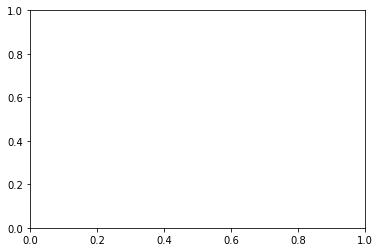

In [ ]:
# Scatter plot Điểm cuối kỳ - Số bài làm đúng của từng SV
Scatter_Plot("Scatterplot Relationship between Final Term Scores and Correct Problems","Correct Problems","Final Term Scores",correct['solved'],CK_score['CK'])

Đếm số bài đã nộp (submited) của từng sinh viên

In [ ]:
submited = wecode.query('is_final == 1')
tmp = submited.groupby('user_id')
submited = tmp['is_final'].count()
submited

user_id
1        2
4       38
5        5
6       88
7        2
        ..
1860    48
1862     6
1864    63
1865    17
1868    27
Name: is_final, Length: 1157, dtype: int64